In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Load the data
train_df = pd.read_csv("D:/titanic/train.csv")
test_df = pd.read_csv("D:/titanic/test.csv")

In [44]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [45]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# Data Understanding
print("Train Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId

In [4]:
# Preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Check for missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Data Cleaning
# Deal with missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [12]:
# Fill missing values for 'Age' and 'Fare' in test data
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


In [14]:
# Data Preprocessing
# Encoding categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)




In [15]:
# Drop irrelevant features
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
passenger_ids = test_df['PassengerId']  # Save PassengerId for later use
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


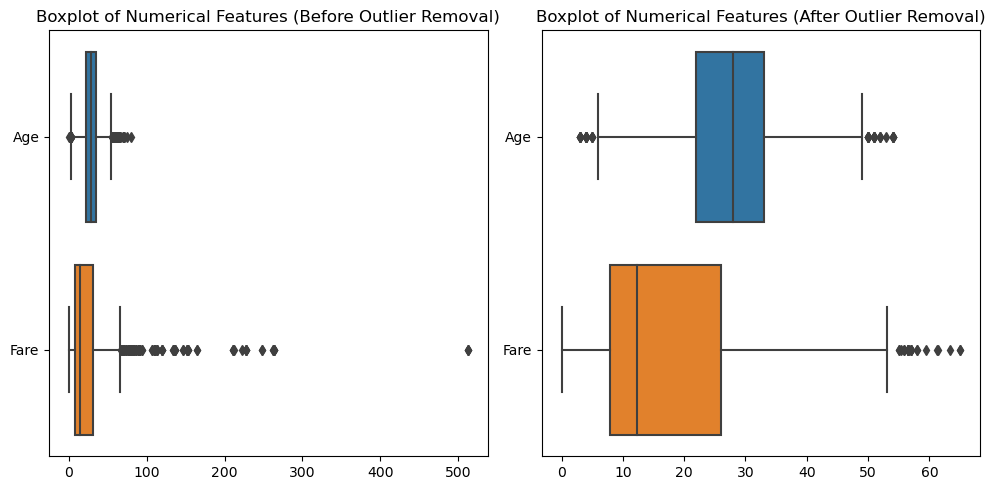

In [18]:
# Outlier Detection and Removal
def remove_outliers(df, features):
    outlier_indices = []
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices.extend(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index)
    outlier_indices = list(set(outlier_indices))  # Remove duplicates
    df.drop(outlier_indices, inplace=True)
    return df

# Specify numerical features for outlier detection
numerical_features = ['Age', 'Fare']

# Before removing outliers
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=train_df[numerical_features], orient="h")
plt.title('Boxplot of Numerical Features (Before Outlier Removal)')

# Remove outliers
train_df_no_outliers = remove_outliers(train_df.copy(), numerical_features)

# After removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=train_df_no_outliers[numerical_features], orient="h")
plt.title('Boxplot of Numerical Features (After Outlier Removal)')

plt.tight_layout()
plt.show()

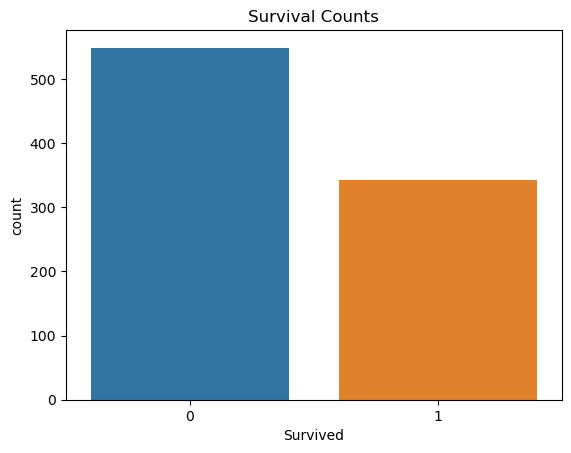

In [19]:
# Exploratory Data Analysis (EDA)
# Visualize survival counts
sns.countplot(data=train_df, x='Survived')
plt.title('Survival Counts')
plt.show()

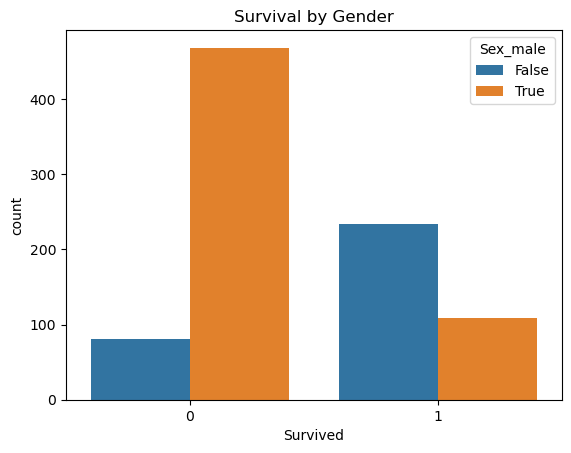

In [28]:
# Explore survival by gender
sns.countplot(data=train_df, x='Survived', hue='Sex_male')
plt.title('Survival by Gender')
plt.show()

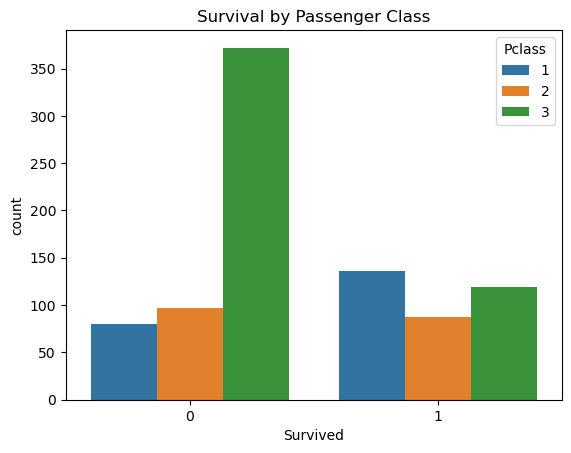

In [29]:
# Explore survival by passenger class
sns.countplot(data=train_df, x='Survived', hue='Pclass')
plt.title('Survival by Passenger Class')
plt.show()

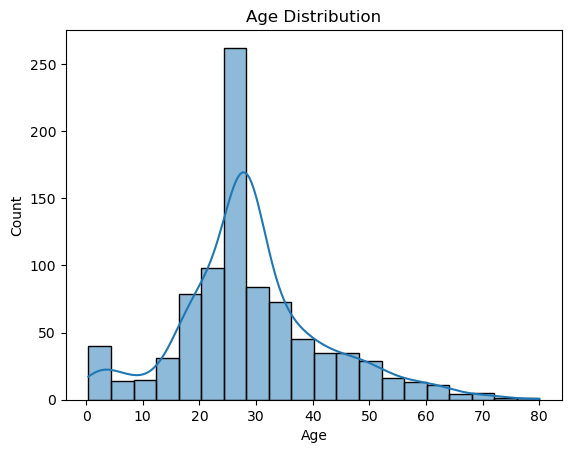

In [30]:
# Explore age distribution
sns.histplot(data=train_df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()


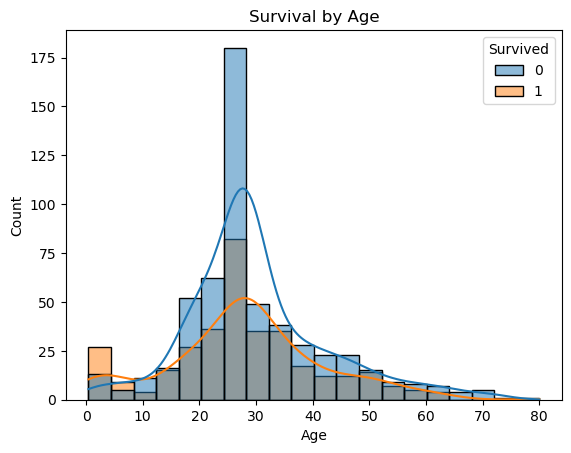

In [31]:
# Explore survival by age
sns.histplot(data=train_df, x='Age', hue='Survived', bins=20, kde=True)
plt.title('Survival by Age')
plt.show()

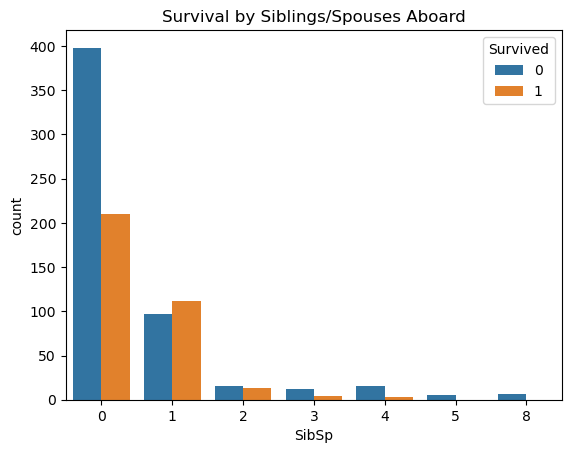

In [32]:
# Explore survival by number of siblings/spouses aboard
sns.countplot(data=train_df, x='SibSp', hue='Survived')
plt.title('Survival by Siblings/Spouses Aboard')
plt.show()


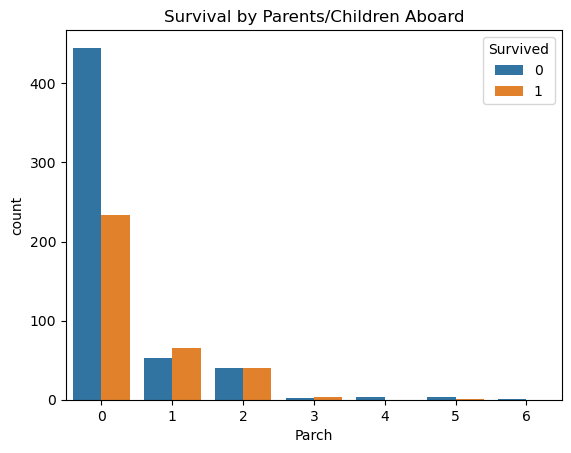

In [33]:
# Explore survival by number of parents/children aboard
sns.countplot(data=train_df, x='Parch', hue='Survived')
plt.title('Survival by Parents/Children Aboard')
plt.show()

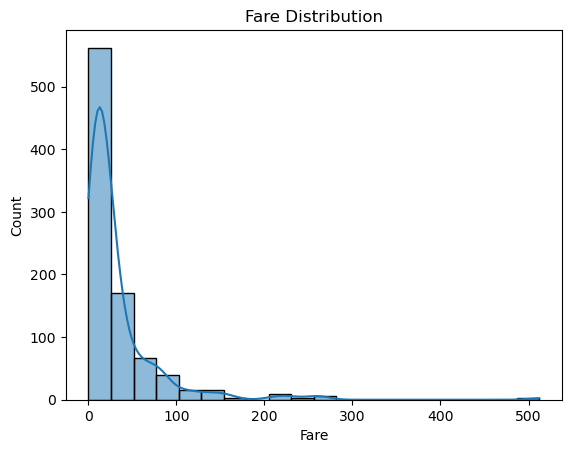

In [34]:
# Explore fare distribution
sns.histplot(data=train_df, x='Fare', bins=20, kde=True)
plt.title('Fare Distribution')
plt.show()

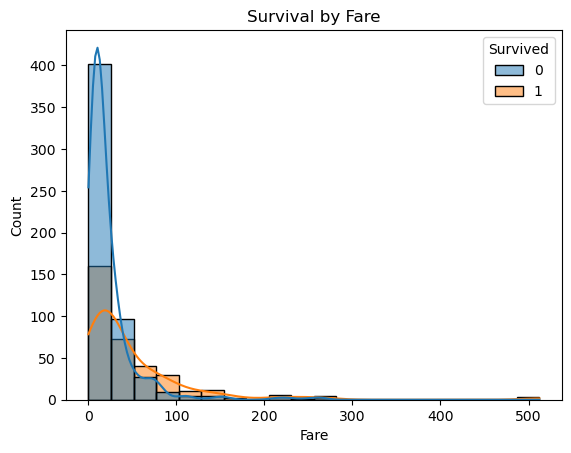

In [35]:
# Explore survival by fare
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=20, kde=True)
plt.title('Survival by Fare')
plt.show()


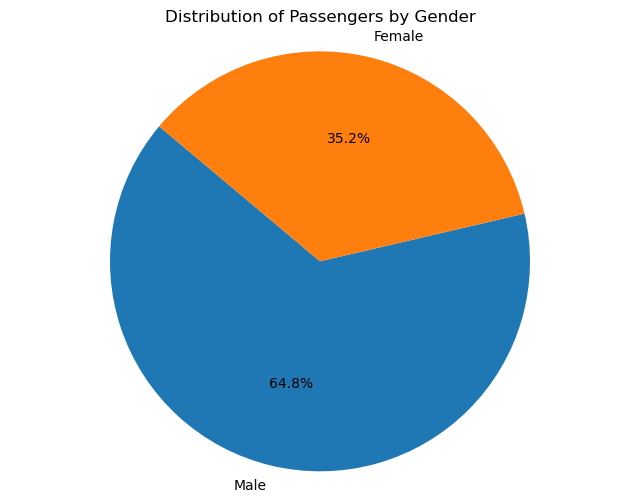

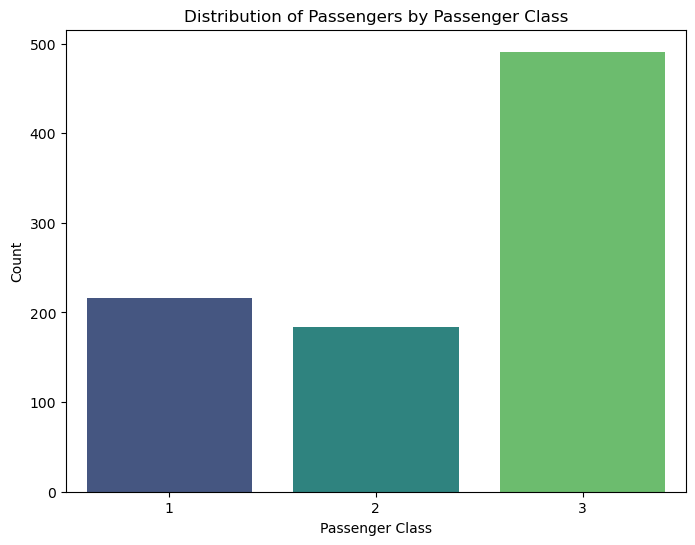

In [37]:
# Univariate Analysis
# Pie chart for distribution of passengers by gender
gender_counts = train_df['Sex_male'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Passengers by Gender')
plt.axis('equal')
plt.show()


# Bar plot for distribution of passengers by passenger class
class_counts = train_df['Pclass'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribution of Passengers by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


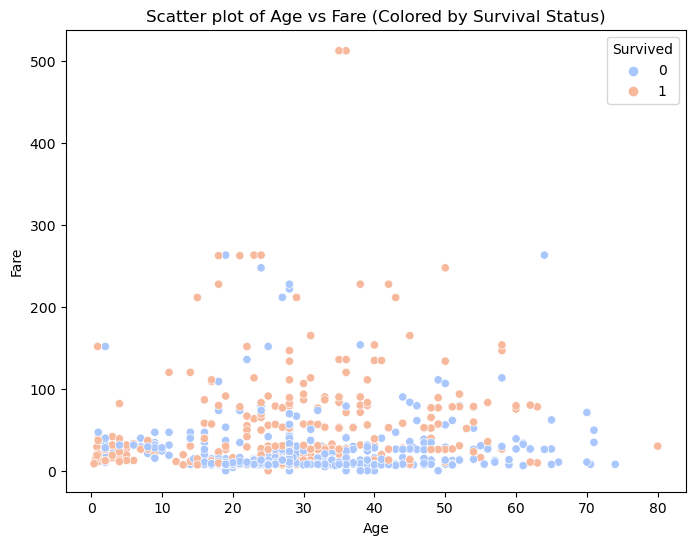

C:\Users\Khushi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


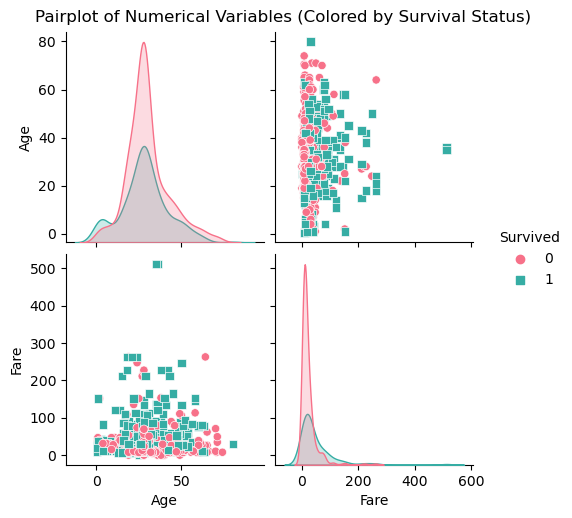

In [38]:
# Multivariate Analysis
# Scatter plot for age vs fare colored by survival status
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df, palette='coolwarm')
plt.title('Scatter plot of Age vs Fare (Colored by Survival Status)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right')
plt.show()

# Pairplot for numerical variables
num_vars = ['Age', 'Fare']
sns.pairplot(train_df, vars=num_vars, hue='Survived', palette='husl', markers=['o', 's'])
plt.suptitle('Pairplot of Numerical Variables (Colored by Survival Status)', y=1.02)
plt.show()

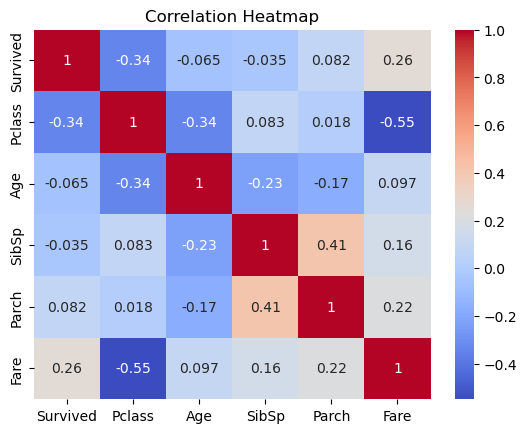

In [39]:
# Correlation heatmap
numeric_columns = train_df.select_dtypes(include=np.number).columns
corr_matrix = train_df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

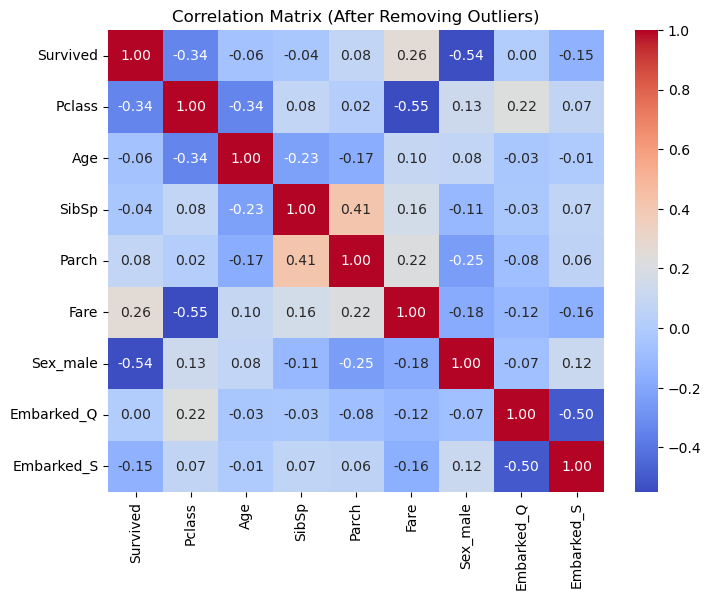

In [41]:
# Correlation matrix after removing outliers
corr = train_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (After Removing Outliers)')
plt.show()

In [42]:
# Splitting data into features and target variable
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_test_scaled)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[91 14]
 [18 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

